# Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

 

### Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

- Данные IMDB;
- Данные NYC;
- Данные NBA.

### Какие графики собираюсь построить?
Я выбрал данные по NYC Taxi Trip Duration с Kaggle: https://www.kaggle.com/c/nyc-taxi-trip-duration/data  

### Импортируем библиотеки, загружаем и преобразовываем данные 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from geopy.distance import vincenty

In [2]:
from geopy.distance import vincenty

def pandasVincenty(row):
    return vincenty((row.pickup_latitude, row.pickup_longitude), (row.dropoff_latitude, row.dropoff_longitude)).km

In [3]:
taxi = pd.read_csv('Desktop/NYC/train.csv')
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['distance'] =  taxi.apply(lambda r: pandasVincenty(r), axis=1)
taxi.head()

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  after removing the cwd from sys.path.


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038


In [4]:
taxi_dynamics = taxi.groupby(taxi['pickup_datetime'].dt.date).agg({'id': 'count', 'trip_duration': 'mean'})
taxi_dynamics = taxi_dynamics.reset_index()
taxi_dynamics['date_ordinal'] = pd.to_datetime(taxi_dynamics['pickup_datetime']).apply(lambda date: date.toordinal())
taxi_dynamics.head()

,pickup_datetime,id,trip_duration,date_ordinal
0,2016-01-01,7162,920.679978,735964
1,2016-01-02,6512,840.084767,735965
2,2016-01-03,6353,924.667086,735966
3,2016-01-04,6725,851.118662,735967
4,2016-01-05,7204,1455.344808,735968


### График 1

Изучаем ср. время 1 поездки и совокупное кол-во поездок в динамике - лучше всего сделать через scatter plot с регрессионной линией, чтобы видеть направление тренда

[Text(0,0,'2015-12-18'),
 Text(0,0,'2016-01-12'),
 Text(0,0,'2016-02-06'),
 Text(0,0,'2016-03-02'),
 Text(0,0,'2016-03-27'),
 Text(0,0,'2016-04-21'),
 Text(0,0,'2016-05-16'),
 Text(0,0,'2016-06-10'),
 Text(0,0,'2016-07-05')]

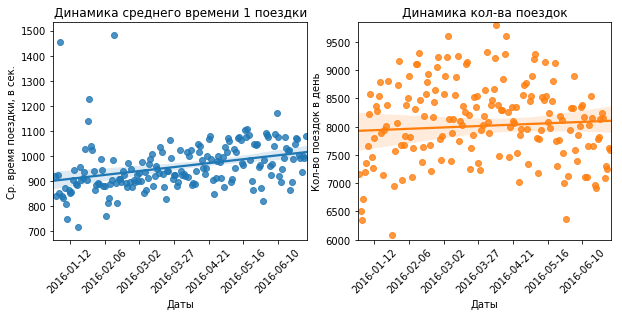

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# создаём графики
sns.regplot(
    data=taxi_dynamics,
    x='date_ordinal',
    y='trip_duration',
    ax = ax1
).set_title('Динамика среднего времени 1 поездки')

sns.regplot(
    data=taxi_dynamics,
    x = 'date_ordinal',
    y = 'id',
    ax = ax2
).set_title('Динамика кол-ва поездок')

# корректируем оси
ax1.set_xlim(taxi_dynamics['date_ordinal'].min() - 1, taxi_dynamics['date_ordinal'].max() + 1)
ax1.set_ylim(taxi_dynamics['trip_duration'].min() - 50, taxi_dynamics['trip_duration'].max() + 50)

ax2.set_xlim(taxi_dynamics['date_ordinal'].min() - 1, taxi_dynamics['date_ordinal'].max() + 1)
ax2.set_ylim(6000, taxi_dynamics['id'].max() + 50)

# преобразовываем даты
new_labels = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
new_labels = [datetime.date(item.year, item.month, item.day) for item in new_labels]

# рисуем графики
ax1.set_ylabel('Ср. время поездки, в сек.')
ax1.set_xlabel('Даты')
ax1.set_xticklabels(new_labels, rotation = 45)

ax2.set_ylabel('Кол-во поездок в день')
ax2.set_xlabel('Даты')
ax2.set_xticklabels(new_labels, rotation = 45)

### График 2

Изучаем распределение времени поездок по кол-ву пассажиров и vendor id - лучше сделать через boxplot, чтобы видеть разброс распределения для каждой группы пассажиров, а также чтобы была возможность сравнивать 

Text(0,0.5,'Ср. время поездки, в мин.')

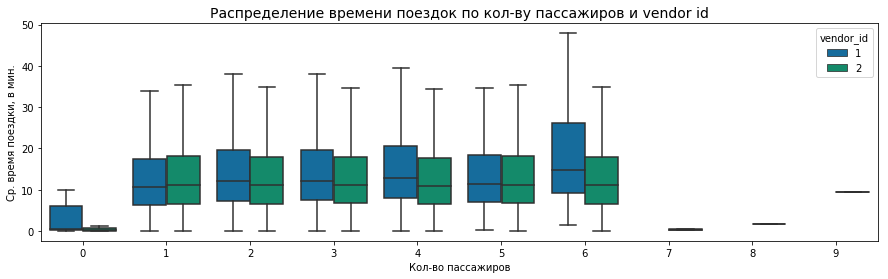

In [55]:
plt.figure(figsize=(15,4))
bplot = sns.boxplot(y=(taxi["trip_duration"]/60), 
            x=taxi['passenger_count'], 
            palette="colorblind", hue = taxi['vendor_id'], showfliers=False)

bplot.axes.set_title("Распределение времени поездок по кол-ву пассажиров и vendor id", fontsize=14)
bplot.set_xlabel("Кол-во пассажиров", fontsize=10)
bplot.set_ylabel("Ср. время поездки, в мин.", fontsize=10)

### График 3 
Делаем некую описательную статистику имеющихся данных - строим распределение для каждого основного параметров нашего массива: время поездки, дистанция, скорость. Это нам даст понимание о размерах и плотности нашего массива данных  

In [7]:
taxi['speed'] = taxi['distance'] / ((taxi['trip_duration']/60)/60)

Text(0.5,0,'Средняя скорость поездки, в км./ч.')

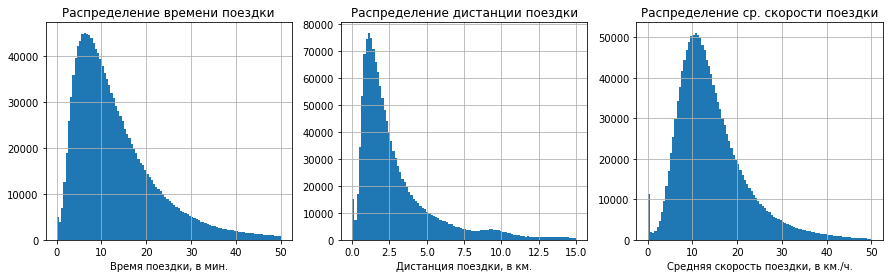

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

ax1 = (taxi[taxi['trip_duration'] < 3000]['trip_duration']/60).hist(bins = 100, ax = ax1)
ax2 = taxi[taxi['distance'] < 15]['distance'].hist(bins = 100, ax = ax2)
ax3 = taxi[taxi['speed'] < 50]['speed'].hist(bins = 100, ax = ax3)

ax1.set_title('Распределение времени поездки')
ax1.set_xlabel('Время поездки, в мин.')

ax2.set_title('Распределение дистанции поездки')
ax2.set_xlabel('Дистанция поездки, в км.')

ax3.set_title('Распределение ср. скорости поездки')
ax3.set_xlabel('Средняя скорость поездки, в км./ч.')

### График 4
Изучаем загрузку по часам и дням недели - пытаемся определить часы пик - лучше сделать через обычный scatterplot

In [84]:
taxi['time'] = taxi['pickup_datetime'].dt.strftime('%H:%M')
taxi['weekday'] = taxi['pickup_datetime'].dt.weekday_name
taxi['month'] = taxi['pickup_datetime'].apply(lambda x: x.strftime('%B'))
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,time,weekday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,11.885316,17:24,Monday,March
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,9.820778,00:43,Sunday,June
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,10.813029,11:35,Tuesday,January
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,12.450063,19:32,Wednesday,April
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,9.823760,13:30,Saturday,March


In [51]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px

init_notebook_mode(connected=True)

In [48]:
rush_hour = taxi.groupby(['time', 'weekday'])['id'].count()
rush_hour = rush_hour.reset_index()
rush_hour = pd.DataFrame(rush_hour)
rush_hour.head()

,time,weekday,id
0,00:00,Friday,142
1,00:00,Monday,75
2,00:00,Saturday,204
3,00:00,Sunday,206
4,00:00,Thursday,134


In [54]:
fig = px.line(rush_hour, x='time', y='id', color='weekday', 
              title = 'Распределение кол-ва поездок по дням недели по часам')
fig.show()

### График 5

Хотим посмотреть на сезон в разрезе месяцев и дней недели - возможно, здесь будет некий паттерн (например, связанный с погодой: весной и летом более теплее, следовательно, меньше поездок на такси). Использую heatmap, т.к. хочу сразу визуально наблюдать куда смещено распределение

In [93]:
seasonality = taxi.pivot_table(
                        index='month', 
                        columns='weekday', 
                        values='id', 
                        aggfunc='size').fillna(0).applymap(float)

seasonality = seasonality[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
seasonality = seasonality.reindex(["January", "February", "March", "April", "May", "June"])
seasonality.head()

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
January,27231.0,29873.0,31314.0,32367.0,41470.0,34701.0,32751.0
February,36158.0,31106.0,32762.0,34707.0,35446.0,36367.0,31754.0
March,29967.0,39315.0,40949.0,42418.0,35585.0,36516.0,31439.0
April,29863.0,32538.0,33054.0,34164.0,43925.0,45855.0,32246.0
May,35465.0,39376.0,32642.0,33996.0,34016.0,34563.0,38429.0


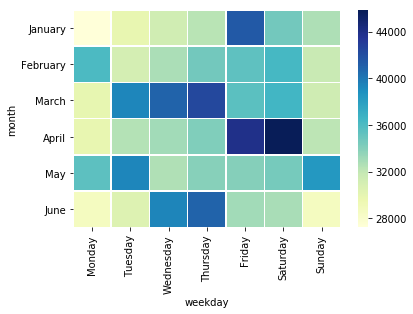

In [94]:
ax = sns.heatmap(seasonality, linewidths=0.5, cmap="YlGnBu")

# Бонус: рисую карту поездок

Решил немного почирить и взять код из открытого кернела в обсуждениях на kaggle:
- https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [56]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [60]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

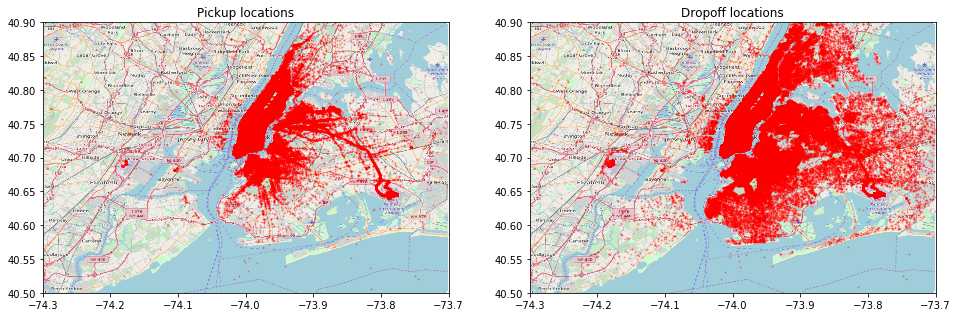

In [62]:
# plot training data on map zoomed in
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)